# Processing Set Visibility Tutorial

## Import xradio

In [1]:
import os, pprint
from importlib.metadata import version

try:
    os.system("pip install --upgrade xradio")

    import xradio

    print("Using xradio version", version("xradio"))

except ImportError as exc:
    print(f"Could not import xradio: {exc}")

Using xradio version 0.0.41


## Download example MSv2

## Preparation

In [2]:
import toolviper

msv2_name = "Antennae_North.cal.lsrk.ms"
toolviper.utils.data.download(file=msv2_name)

[2024-09-30 18:31:57,586]  WARNING   toolviper:  File exists: /Users/jsteeb/miniforge3/envs/zinc/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2024-09-30 18:31:57,586]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List               
 ──────────────────────────── 
  Antennae_North.cal.lsrk.ms

Antennae_North.cal.lsrk.ms.zip:   0%|          | 0.00/181M [00:00<?, ?iB/s]

# Processing Set

## Convert MSv2 => Processing Set (PS)

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

msv2_name = "Antennae_North.cal.lsrk.ms"
convert_out = "Antennae_North.cal.lsrk.vis.zarr"
convert_msv2_to_processing_set(
    in_file=msv2_name,
    out_file=convert_out,
    overwrite=True,
)

[2024-09-30 18:32:07,187]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-09-30 18:32:07,397]     INFO   toolviper:  Number of partitions: 92 
[2024-09-30 18:32:07,397]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [22 29 36 27], FIELD [1], SCAN [ 9 13 17 25] 
[2024-09-30 18:32:07,503]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [23 30 37 28], FIELD [2], SCAN [ 9 13 17 25] 
[2024-09-30 18:32:07,619]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [24 31 22 29], FIELD [3], SCAN [ 9 13 21 25] 
[2024-09-30 18:32:07,750]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [25 32 23 30], FIELD [4], SCAN [ 9 13 21 25] 
[2024-09-30 18:32:07,861]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [26 33 24 31], FIELD [5], SCAN [ 9 13 21 25] 
[2024-09-30 18:32:07,971]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [27 34 25 32], FIELD [6], SCAN [ 9 13 21 25] 


## Lazy open PS

In [4]:
from xradio.measurement_set import open_processing_set

convert_out = "Antennae_North.cal.lsrk.vis.zarr"
intents = ["OBSERVE_TARGET#ON_SOURCE"]
ps = open_processing_set(convert_out, intents=intents)

In [5]:
ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
48,Antennae_North.cal.lsrk_00,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[9, 13, 17, 25]",spw_0,[NGC4038 - Antennae North_1],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m51.90s, -18d51m49.94s]",3.430183e+11,3.448715e+11
60,Antennae_North.cal.lsrk_01,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[9, 13, 17, 25]",spw_0,[NGC4038 - Antennae North_2],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m52.43s, -18d51m49.94s]",3.430183e+11,3.448715e+11
19,Antennae_North.cal.lsrk_02,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[9, 13, 21, 25]",spw_0,[NGC4038 - Antennae North_3],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m52.96s, -18d51m49.94s]",3.430183e+11,3.448715e+11
6,Antennae_North.cal.lsrk_03,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[9, 13, 21, 25]",spw_0,[NGC4038 - Antennae North_4],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m53.49s, -18d51m49.94s]",3.430183e+11,3.448715e+11
7,Antennae_North.cal.lsrk_04,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[9, 13, 21, 25]",spw_0,[NGC4038 - Antennae North_5],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m54.01s, -18d51m49.94s]",3.430183e+11,3.448715e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
30,Antennae_North.cal.lsrk_87,"[OBSERVE_TARGET#ON_SOURCE, CALIBRATE_WVR#ON_SO...","(15, 77, 166, 2)","[XX, YY]","[52, 56, 64]",spw_0,[NGC4038 - Antennae North_19],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m51.90s, -18d52m15.90s]",3.430183e+11,3.448715e+11
44,Antennae_North.cal.lsrk_88,"[OBSERVE_TARGET#ON_SOURCE, CALIBRATE_WVR#ON_SO...","(15, 77, 166, 2)","[XX, YY]","[52, 56, 64]",spw_0,[NGC4038 - Antennae North_20],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m52.43s, -18d52m15.90s]",3.430183e+11,3.448715e+11
26,Antennae_North.cal.lsrk_89,"[OBSERVE_TARGET#ON_SOURCE, CALIBRATE_WVR#ON_SO...","(15, 77, 166, 2)","[XX, YY]","[52, 56, 64]",spw_0,[NGC4038 - Antennae North_21],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m52.96s, -18d52m15.90s]",3.430183e+11,3.448715e+11
67,Antennae_North.cal.lsrk_90,"[OBSERVE_TARGET#ON_SOURCE, CALIBRATE_WVR#ON_SO...","(15, 77, 166, 2)","[XX, YY]","[52, 56, 64]",spw_0,[NGC4038 - Antennae North_22],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m53.49s, -18d52m15.90s]",3.430183e+11,3.448715e+11


## PS Structure

A processing set is simply a dictionary of MSv4s (one per observation, field, intent, spectral window - polarization...):

In [6]:
len(ps)

92

In [7]:
ps.keys()

dict_keys(['Antennae_North.cal.lsrk_61', 'Antennae_North.cal.lsrk_66', 'Antennae_North.cal.lsrk_59', 'Antennae_North.cal.lsrk_50', 'Antennae_North.cal.lsrk_57', 'Antennae_North.cal.lsrk_68', 'Antennae_North.cal.lsrk_03', 'Antennae_North.cal.lsrk_04', 'Antennae_North.cal.lsrk_32', 'Antennae_North.cal.lsrk_35', 'Antennae_North.cal.lsrk_56', 'Antennae_North.cal.lsrk_69', 'Antennae_North.cal.lsrk_51', 'Antennae_North.cal.lsrk_67', 'Antennae_North.cal.lsrk_58', 'Antennae_North.cal.lsrk_60', 'Antennae_North.cal.lsrk_34', 'Antennae_North.cal.lsrk_33', 'Antennae_North.cal.lsrk_05', 'Antennae_North.cal.lsrk_02', 'Antennae_North.cal.lsrk_20', 'Antennae_North.cal.lsrk_27', 'Antennae_North.cal.lsrk_18', 'Antennae_North.cal.lsrk_11', 'Antennae_North.cal.lsrk_16', 'Antennae_North.cal.lsrk_29', 'Antennae_North.cal.lsrk_89', 'Antennae_North.cal.lsrk_42', 'Antennae_North.cal.lsrk_45', 'Antennae_North.cal.lsrk_73', 'Antennae_North.cal.lsrk_87', 'Antennae_North.cal.lsrk_80', 'Antennae_North.cal.lsrk_74',

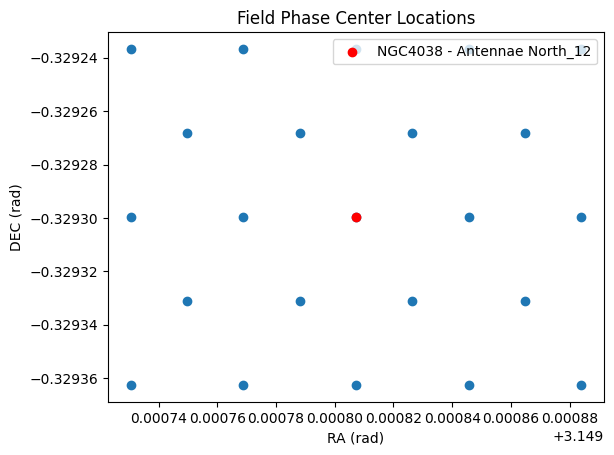

In [34]:
ps.plot_phase_centers()

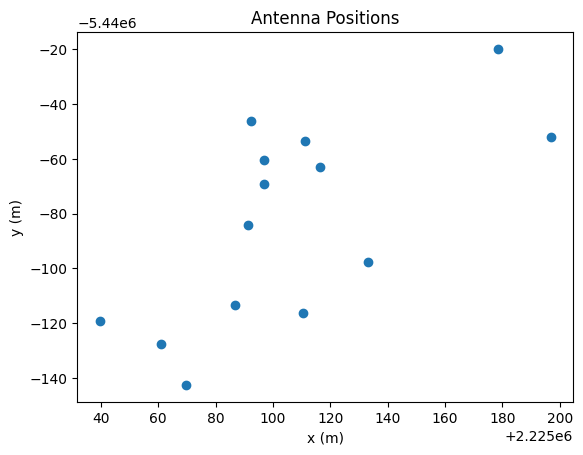

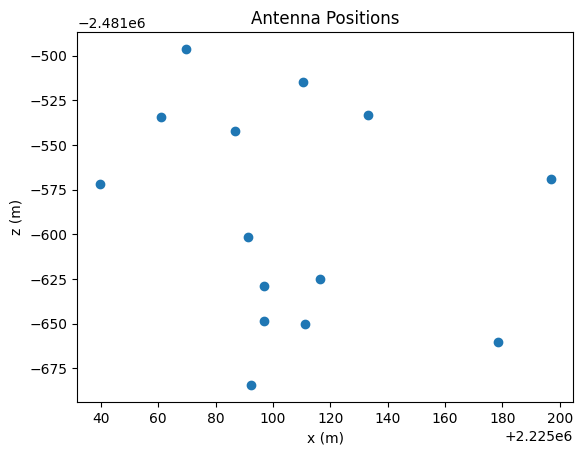

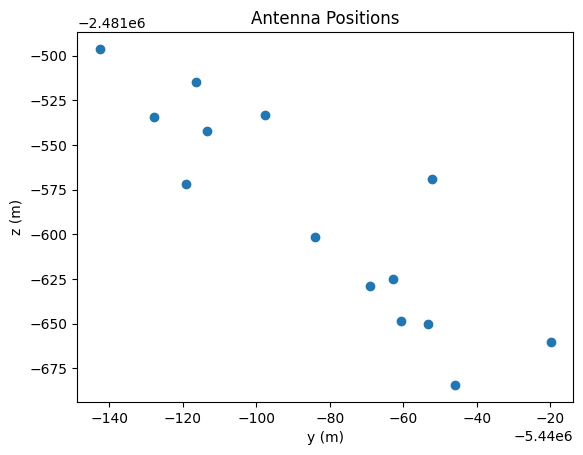

In [35]:
ps.plot_antenna_positions()

## MSv4


## Main dataset

We can take one of the items of the Processing Set to look into the contents of that MSv4. Every MSv4 represents the data as an xarray dataset, similarly as in earlier CNGI prototypes. The data variables (visibilities, weights, flags, etc.) can be manipulated and used in computations using the xarray API.

In [8]:
main_xds = ps[
    "Antennae_North.cal.lsrk_01"
]

In [9]:
main_xds

<xarray.MeasurementSetXds> Size: 4MB
Dimensions:                     (baseline_id: 45, time: 20, frequency: 166,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 360B 0 1 2 3 ... 41 42 43 44
    scan_number                 (time) int64 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * time                        (time) float64 160B 1.307e+09 ... 1.307e+09
  * frequency                   (frequency) float64 1kB 3.43e+11 ... 3.449e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 7kB dask.array<chunksize=(20, 45), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 299kB dask.array<chunksize=(20, 45, 166, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 7kB dask.array<chunksize=(20, 45), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 22kB dask.array<chunksize=(20, 45, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 2MB dask.array<chunksize=(20, 45, 166, 2), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 1MB dask.array<chunksize=(20, 45, 166, 2), meta=np.ndarray>
Attributes:
    creation_date:     2024-09-30T22:32:07.516661
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['Unknown'], 'project': 'T.B.D.', 'releas...
    partition_info:    {'field_name': ['NGC4038 - Antennae North_2'], 'intent...
    processor_info:    {'sub_type': 'ALMA_CORRELATOR_MODE', 'type': 'CORRELAT...
    schema_version:    4.0.-9997
    type:              visibility
    xradio_version:    0.0.41
    antenna_xds:       <xarray.Dataset> Size: 2kB\nDimensions:               ...

### Coordinates

In [10]:
main_xds.polarization

<xarray.DataArray 'polarization' (polarization: 2)> Size: 16B
array(['XX', 'YY'], dtype='<U2')
Coordinates:
  * polarization  (polarization) <U2 16B 'XX' 'YY'

In [11]:
main_xds.uvw_label

<xarray.DataArray 'uvw_label' (uvw_label: 3)> Size: 12B
array(['u', 'v', 'w'], dtype='<U1')
Coordinates:
  * uvw_label  (uvw_label) <U1 12B 'u' 'v' 'w'

In [12]:
main_xds.coords["baseline_id"]

<xarray.DataArray 'baseline_id' (baseline_id: 45)> Size: 360B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44])
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
    baseline_antenna2_name  (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
  * baseline_id             (baseline_id) int64 360B 0 1 2 3 4 ... 41 42 43 44

In [13]:
main_xds.time

<xarray.DataArray 'time' (time: 20)> Size: 160B
array([1.306547e+09, 1.306547e+09, 1.306547e+09, 1.306547e+09, 1.306547e+09,
       1.306548e+09, 1.306548e+09, 1.306548e+09, 1.306548e+09, 1.306548e+09,
       1.306549e+09, 1.306549e+09, 1.306549e+09, 1.306549e+09, 1.306549e+09,
       1.306550e+09, 1.306550e+09, 1.306550e+09, 1.306550e+09, 1.306550e+09])
Coordinates:
    scan_number  (time) int64 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * time         (time) float64 160B 1.307e+09 1.307e+09 ... 1.307e+09 1.307e+09
Attributes:
    effective_integration_time:  EFFECTIVE_INTEGRATION_TIME
    format:                      unix
    integration_time:            {'attrs': {'type': 'quantity', 'units': ['s'...
    scale:                       utc
    type:                        time
    units:                       ['s']

### Data vars

In [14]:
main_xds.VISIBILITY

<xarray.DataArray 'VISIBILITY' (time: 20, baseline_id: 45, frequency: 166,
                                polarization: 2)> Size: 2MB
dask.array<open_dataset-VISIBILITY, shape=(20, 45, 166, 2), dtype=complex64, chunksize=(20, 45, 166, 2), chunktype=numpy.ndarray>
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
    baseline_antenna2_name  (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
  * baseline_id             (baseline_id) int64 360B 0 1 2 3 4 ... 41 42 43 44
    scan_number             (time) int64 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * time                    (time) float64 160B 1.307e+09 ... 1.307e+09
  * frequency               (frequency) float64 1kB 3.43e+11 ... 3.449e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'
Attributes:
    type:                  quanta
    units:                 ['unkown']
    field_and_source_xds:  <xarray.Dataset> Size: 264B\nDimensions:          ...

In [15]:
main_xds.FLAG

<xarray.DataArray 'FLAG' (time: 20, baseline_id: 45, frequency: 166,
                          polarization: 2)> Size: 299kB
dask.array<open_dataset-FLAG, shape=(20, 45, 166, 2), dtype=bool, chunksize=(20, 45, 166, 2), chunktype=numpy.ndarray>
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
    baseline_antenna2_name  (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
  * baseline_id             (baseline_id) int64 360B 0 1 2 3 4 ... 41 42 43 44
    scan_number             (time) int64 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * time                    (time) float64 160B 1.307e+09 ... 1.307e+09
  * frequency               (frequency) float64 1kB 3.43e+11 ... 3.449e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'

In [16]:
main_xds.VISIBILITY.max()

<xarray.DataArray 'VISIBILITY' ()> Size: 8B
dask.array<_nanmax_skip-aggregate, shape=(), dtype=complex64, chunksize=(), chunktype=numpy.ndarray>

In [17]:
main_xds.VISIBILITY.max().compute()
# main_xds.VISIBILITY.max().values

<xarray.DataArray 'VISIBILITY' ()> Size: 8B
array(3.1386611+0.5675047j, dtype=complex64)

## Metadata

The MS metadata can be found in the attributes of the main_xds. Metadata is stored in differente ways:
- in additional xarray (sub)datasets, "sub-xds"
- in attributes of coordinates and data variables
- in Python dictionaries.

An example of sub-xds is the antenna dataset. And example of dictionary is the Field info dict.

### Metadata in sub-xds. Antenna dataset

The MSv4 has xarray datasets in its attributes that represent metadata where n-dimensional arrays is included. This would be the equivalent to subtables of the MSv2. Let's look into the antenna sub-xds:


In [18]:
ant_xds = main_xds.attrs["antenna_xds"]

In [19]:
ant_xds

<xarray.Dataset> Size: 2kB
Dimensions:                 (antenna_name: 10, cartesian_pos_label: 3,
                             receptor_label: 2, sky_dir_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U9 360B 'DV02_A015' ... 'PM03_J504'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
  * sky_dir_label           (sky_dir_label) <U3 24B 'ra' 'dec'
    station                 (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  ALMA
    relocatable_antennas:    True
    type:                    antenna

As an xarray dataset, the antenna sub-xds can be used via the same API as the main xds.

In [20]:
ant_xds.ANTENNA_POSITION  # .values to load and see them

<xarray.DataArray 'ANTENNA_POSITION' (antenna_name: 10, cartesian_pos_label: 3)> Size: 240B
dask.array<open_dataset-ANTENNA_POSITION, shape=(10, 3), dtype=float64, chunksize=(10, 3), chunktype=numpy.ndarray>
Coordinates:
  * antenna_name         (antenna_name) <U9 360B 'DV02_A015' ... 'PM03_J504'
  * cartesian_pos_label  (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    station              (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name       (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    coordinate_system:   geocentric
    frame:               GRS80
    origin_object_name:  earth
    type:                location
    units:               ['m', 'm', 'm']

In [21]:
ant_xds.ANTENNA_DISH_DIAMETER

<xarray.DataArray 'ANTENNA_DISH_DIAMETER' (antenna_name: 10)> Size: 80B
dask.array<open_dataset-ANTENNA_DISH_DIAMETER, shape=(10,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * antenna_name    (antenna_name) <U9 360B 'DV02_A015' ... 'PM03_J504'
    mount           (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    station         (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name  (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    type:     quantity
    units:    ['m']

In [22]:
ant_xds.ANTENNA_RECEPTOR_ANGLE

<xarray.DataArray 'ANTENNA_RECEPTOR_ANGLE' (antenna_name: 10, receptor_label: 2)> Size: 160B
dask.array<open_dataset-ANTENNA_RECEPTOR_ANGLE, shape=(10, 2), dtype=float64, chunksize=(10, 2), chunktype=numpy.ndarray>
Coordinates:
  * antenna_name       (antenna_name) <U9 360B 'DV02_A015' ... 'PM03_J504'
    mount              (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    polarization_type  (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
  * receptor_label     (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station            (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name     (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    type:     quantity
    units:    ['rad']

### Attributes of Data Arrays and Coordinates. Quantities and Measures

All data variables and coordinates can have quantity and measures information in their attributes section along with other relevant metadata. These measures are specified as dictionaries in the attribute of the data variable or coordinate, with keys `units` and `type` in addition to other keys depending on the type of quantity. The naming conventions are based on `astropy`. For example a quantity of casacore/`position` type, such as the antenna positions, is a quantity with `type: "earth_location"`

For reference, this is the list of measures in the current Processing Set/MSv4 spec:
https://docs.google.com/spreadsheets/d/14a6qMap9M5r_vjpLnaBKxsR9TF4azN5LVdOxLacOX-s/edit#gid=1504318014, with naming conventions based on astropy. For example, a casacore `direction` is a `sky_coord`.



#### Time coordinate
The time coordinate is a time measure (keys: `type`, `units`, `time_scale`, `format`) but also contains for example `integration_time` which is a quantity.

In [23]:
main_xds.time

<xarray.DataArray 'time' (time: 20)> Size: 160B
array([1.306547e+09, 1.306547e+09, 1.306547e+09, 1.306547e+09, 1.306547e+09,
       1.306548e+09, 1.306548e+09, 1.306548e+09, 1.306548e+09, 1.306548e+09,
       1.306549e+09, 1.306549e+09, 1.306549e+09, 1.306549e+09, 1.306549e+09,
       1.306550e+09, 1.306550e+09, 1.306550e+09, 1.306550e+09, 1.306550e+09])
Coordinates:
    scan_number  (time) int64 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * time         (time) float64 160B 1.307e+09 1.307e+09 ... 1.307e+09 1.307e+09
Attributes:
    effective_integration_time:  EFFECTIVE_INTEGRATION_TIME
    format:                      unix
    integration_time:            {'attrs': {'type': 'quantity', 'units': ['s'...
    scale:                       utc
    type:                        time
    units:                       ['s']

##### Quantities and measures that are not xarray

When a quantity or a measure is not an xarray, it is specificed as a dictionary with a format based on xarray's [xarray.DataArray.from_dict()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.from_dict.html) and it has the following keys:
`{"dims": ..., "data": ..., "attrs": quantity/measures_dict}`. The `integration_time` attribute included in the  attributes of the time coordinate is an example:

In [24]:
pprint.pprint(main_xds.time.attrs)

{'effective_integration_time': 'EFFECTIVE_INTEGRATION_TIME',
 'format': 'unix',
 'integration_time': {'attrs': {'type': 'quantity', 'units': ['s']},
                      'data': 6.048,
                      'dims': []},
 'scale': 'utc',
 'type': 'time',
 'units': ['s']}


#### Frequency coordinate

The `frequency` coordinate is a `spectral_coord` measure and as such has the following keys in its attributes: `type`, `units`, and `frame`. In addition, the attributes contain the `channel_width`, `spectral_window_name`, and `reference_frequency`.

Any metadata that is a quantity or measure (non-id numbers) is placed in the relevant measures or quantity dictionary.

In [25]:
main_xds.frequency

<xarray.DataArray 'frequency' (frequency: 166)> Size: 1kB
array([3.430183e+11, 3.430296e+11, 3.430408e+11, 3.430520e+11, 3.430633e+11,
       3.430745e+11, 3.430857e+11, 3.430970e+11, 3.431082e+11, 3.431194e+11,
       3.431307e+11, 3.431419e+11, 3.431531e+11, 3.431644e+11, 3.431756e+11,
       3.431868e+11, 3.431980e+11, 3.432093e+11, 3.432205e+11, 3.432317e+11,
       3.432430e+11, 3.432542e+11, 3.432654e+11, 3.432767e+11, 3.432879e+11,
       3.432991e+11, 3.433104e+11, 3.433216e+11, 3.433328e+11, 3.433441e+11,
       3.433553e+11, 3.433665e+11, 3.433778e+11, 3.433890e+11, 3.434002e+11,
       3.434114e+11, 3.434227e+11, 3.434339e+11, 3.434451e+11, 3.434564e+11,
       3.434676e+11, 3.434788e+11, 3.434901e+11, 3.435013e+11, 3.435125e+11,
       3.435238e+11, 3.435350e+11, 3.435462e+11, 3.435575e+11, 3.435687e+11,
       3.435799e+11, 3.435912e+11, 3.436024e+11, 3.436136e+11, 3.436248e+11,
       3.436361e+11, 3.436473e+11, 3.436585e+11, 3.436698e+11, 3.436810e+11,
       3.436922e+11, 3.437035e+11, 3.437147e+11, 3.437259e+11, 3.437372e+11,
       3.437484e+11, 3.437596e+11, 3.437709e+11, 3.437821e+11, 3.437933e+11,
       3.438046e+11, 3.438158e+11, 3.438270e+11, 3.438382e+11, 3.438495e+11,
       3.438607e+11, 3.438719e+11, 3.438832e+11, 3.438944e+11, 3.439056e+11,
       3.439169e+11, 3.439281e+11, 3.439393e+11, 3.439506e+11, 3.439618e+11,
       3.439730e+11, 3.439843e+11, 3.439955e+11, 3.440067e+11, 3.440179e+11,
       3.440292e+11, 3.440404e+11, 3.440516e+11, 3.440629e+11, 3.440741e+11,
       3.440853e+11, 3.440966e+11, 3.441078e+11, 3.441190e+11, 3.441303e+11,
       3.441415e+11, 3.441527e+11, 3.441640e+11, 3.441752e+11, 3.441864e+11,
       3.441977e+11, 3.442089e+11, 3.442201e+11, 3.442313e+11, 3.442426e+11,
       3.442538e+11, 3.442650e+11, 3.442763e+11, 3.442875e+11, 3.442987e+11,
       3.443100e+11, 3.443212e+11, 3.443324e+11, 3.443437e+11, 3.443549e+11,
       3.443661e+11, 3.443774e+11, 3.443886e+11, 3.443998e+11, 3.444111e+11,
       3.444223e+11, 3.444335e+11, 3.444447e+11, 3.444560e+11, 3.444672e+11,
       3.444784e+11, 3.444897e+11, 3.445009e+11, 3.445121e+11, 3.445234e+11,
       3.445346e+11, 3.445458e+11, 3.445571e+11, 3.445683e+11, 3.445795e+11,
       3.445908e+11, 3.446020e+11, 3.446132e+11, 3.446244e+11, 3.446357e+11,
       3.446469e+11, 3.446581e+11, 3.446694e+11, 3.446806e+11, 3.446918e+11,
       3.447031e+11, 3.447143e+11, 3.447255e+11, 3.447368e+11, 3.447480e+11,
       3.447592e+11, 3.447705e+11, 3.447817e+11, 3.447929e+11, 3.448042e+11,
       3.448154e+11, 3.448266e+11, 3.448378e+11, 3.448491e+11, 3.448603e+11,
       3.448715e+11])
Coordinates:
  * frequency  (frequency) float64 1kB 3.43e+11 3.43e+11 ... 3.449e+11 3.449e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    frame:                 LSRK
    reference_frequency:   {'attrs': {'frame': 'LSRK', 'type': 'spectral_coor...
    spectral_window_id:    0
    spectral_window_name:  spw_0
    type:                  spectral_coord
    units:                 ['Hz']

In the frequency coordinate we have example of:
- quantity given as a dict: `channel_width`
- measure given as a dict: `reference_frequency` (a `spectral_coord` ~= casacore/frequency)

In [26]:
pprint.pprint(main_xds.frequency.attrs)

{'channel_width': {'attrs': {'type': 'quantity', 'units': ['Hz']},
                   'data': 11231488.981445312,
                   'dims': []},
 'frame': 'LSRK',
 'reference_frequency': {'attrs': {'frame': 'LSRK',
                                   'type': 'spectral_coord',
                                   'units': ['Hz']},
                         'data': 344871541760.4001,
                         'dims': []},
 'spectral_window_id': 0,
 'spectral_window_name': 'spw_0',
 'type': 'spectral_coord',
 'units': ['Hz']}


### Metadata in dicts. Field info.

The MSv4 also allows for info dictionaries in the attribute section of the dataset. This is used when no n-dimensional data is required. The relevant measures metadata is included, similarly as with coordinates and data variables (when non-id) in xarray datasets.

An example is the field_info where the delay_direction, phase_direction, and reference_direction are stored as `sky_coord` measures (keys: `type`, `units`, `reference_frame`).

In [27]:
main_xds.VISIBILITY.field_and_source_xds

<xarray.Dataset> Size: 264B
Dimensions:             (sky_dir_label: 2)
Coordinates:
    field_name          <U26 104B ...
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         <U26 104B ...
Data variables:
    FIELD_PHASE_CENTER  (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    SOURCE_LOCATION     (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    is_ephemeris:  False
    type:          field_and_source

## Selection examples

One can use the usual selection functionality of xarray with all arrays, the main dataset and all sub datasets. For example, selection by labels, `sel()`:

In [28]:
sel_xds = main_xds.sel(frequency=slice(3.43939e11, 3.4397e11))
sel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([3.439393e+11, 3.439506e+11, 3.439618e+11])
Coordinates:
  * frequency  (frequency) float64 24B 3.439e+11 3.44e+11 3.44e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    frame:                 LSRK
    reference_frequency:   {'attrs': {'frame': 'LSRK', 'type': 'spectral_coor...
    spectral_window_id:    0
    spectral_window_name:  spw_0
    type:                  spectral_coord
    units:                 ['Hz']

Or selection by indices, `isel()`

In [29]:
isel_xds = main_xds.isel(frequency=slice(1, 4))
isel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([3.430296e+11, 3.430408e+11, 3.430520e+11])
Coordinates:
  * frequency  (frequency) float64 24B 3.43e+11 3.43e+11 3.431e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    frame:                 LSRK
    reference_frequency:   {'attrs': {'frame': 'LSRK', 'type': 'spectral_coor...
    spectral_window_id:    0
    spectral_window_name:  spw_0
    type:                  spectral_coord
    units:                 ['Hz']

In [30]:
sel_xds.equals(isel_xds)

False

In [31]:
sel_xds.identical(isel_xds)

False

In [32]:
isel_xds

<xarray.MeasurementSetXds> Size: 110kB
Dimensions:                     (baseline_id: 45, time: 20, frequency: 3,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 360B 0 1 2 3 ... 41 42 43 44
    scan_number                 (time) int64 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * time                        (time) float64 160B 1.307e+09 ... 1.307e+09
  * frequency                   (frequency) float64 24B 3.43e+11 ... 3.431e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 7kB dask.array<chunksize=(20, 45), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 5kB dask.array<chunksize=(20, 45, 3, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 7kB dask.array<chunksize=(20, 45), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 22kB dask.array<chunksize=(20, 45, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 43kB dask.array<chunksize=(20, 45, 3, 2), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 22kB dask.array<chunksize=(20, 45, 3, 2), meta=np.ndarray>
Attributes:
    creation_date:     2024-09-30T22:32:07.516661
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['Unknown'], 'project': 'T.B.D.', 'releas...
    partition_info:    {'field_name': ['NGC4038 - Antennae North_2'], 'intent...
    processor_info:    {'sub_type': 'ALMA_CORRELATOR_MODE', 'type': 'CORRELAT...
    schema_version:    4.0.-9997
    type:              visibility
    xradio_version:    0.0.41
    antenna_xds:       <xarray.Dataset> Size: 2kB\nDimensions:               ...

In [33]:
sel_xds

<xarray.MeasurementSetXds> Size: 110kB
Dimensions:                     (baseline_id: 45, time: 20, frequency: 3,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U9 2kB dask.array<chunksize=(45,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 360B 0 1 2 3 ... 41 42 43 44
    scan_number                 (time) int64 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * time                        (time) float64 160B 1.307e+09 ... 1.307e+09
  * frequency                   (frequency) float64 24B 3.439e+11 ... 3.44e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 7kB dask.array<chunksize=(20, 45), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 5kB dask.array<chunksize=(20, 45, 3, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 7kB dask.array<chunksize=(20, 45), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 22kB dask.array<chunksize=(20, 45, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 43kB dask.array<chunksize=(20, 45, 3, 2), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 22kB dask.array<chunksize=(20, 45, 3, 2), meta=np.ndarray>
Attributes:
    creation_date:     2024-09-30T22:32:07.516661
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['Unknown'], 'project': 'T.B.D.', 'releas...
    partition_info:    {'field_name': ['NGC4038 - Antennae North_2'], 'intent...
    processor_info:    {'sub_type': 'ALMA_CORRELATOR_MODE', 'type': 'CORRELAT...
    schema_version:    4.0.-9997
    type:              visibility
    xradio_version:    0.0.41
    antenna_xds:       <xarray.Dataset> Size: 2kB\nDimensions:               ...